# Support Vector Machine

In [41]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat

%matplotlib inline

In [42]:
# data path
DATAPATH_1=('data/ex6data1.mat')
DATAPATH_2=('data/ex6data2.mat')
DATAPATH_3=('data/ex6data3.mat')
DATA_SPAM_TRAIN=('data/spamTrain.mat')
DATA_SPAM_TEST=('data/spamTest.mat')


In [43]:
# plot data
def plot_data(X,y,xlabel,ylabel,pos_label,neg_label,xmin,xmax,ymin,ymax,axes=None):
    plt.rcParams['figure.figsize']=(20,14)
    
    pos=y[:,0]==1
    neg=y[:,0]==0
    
    if axes==None:
        axes=plt.gca()
    axes.scatter(X[pos][:,0],X[pos][:,1],marker='o',c='green',label=pos_label)
    axes.scatter(X[neg][:,0],X[neg][:,1],marker='o',c='purple',label=neg_label)
    
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])
    
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
    axes.legend(bbox_to_anchor=(1,1),fancybox=True)
    
    
    
    

## SVM with small regularization parameter

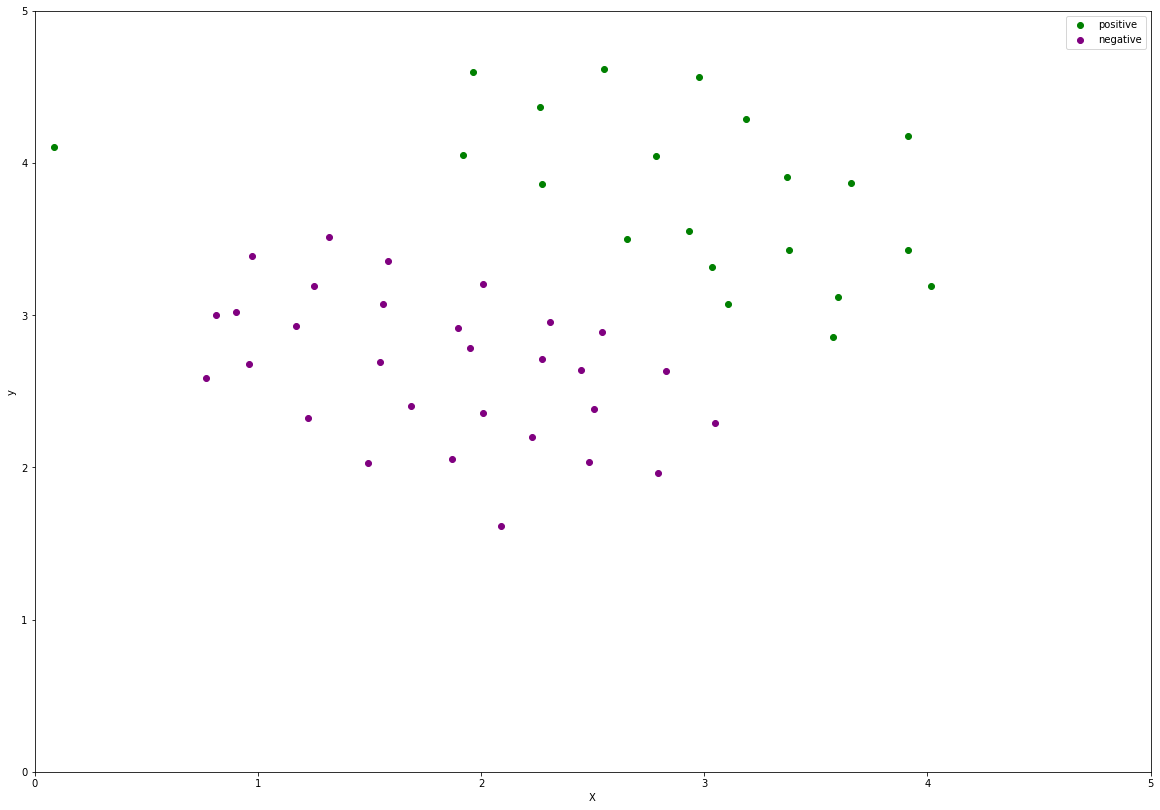

In [44]:
# look at dataset
data1=loadmat(DATAPATH_1)
X=data1['X']
y=data1['y']

plot_data(X,y,'X','y','positive','negative',0,5,0,5)

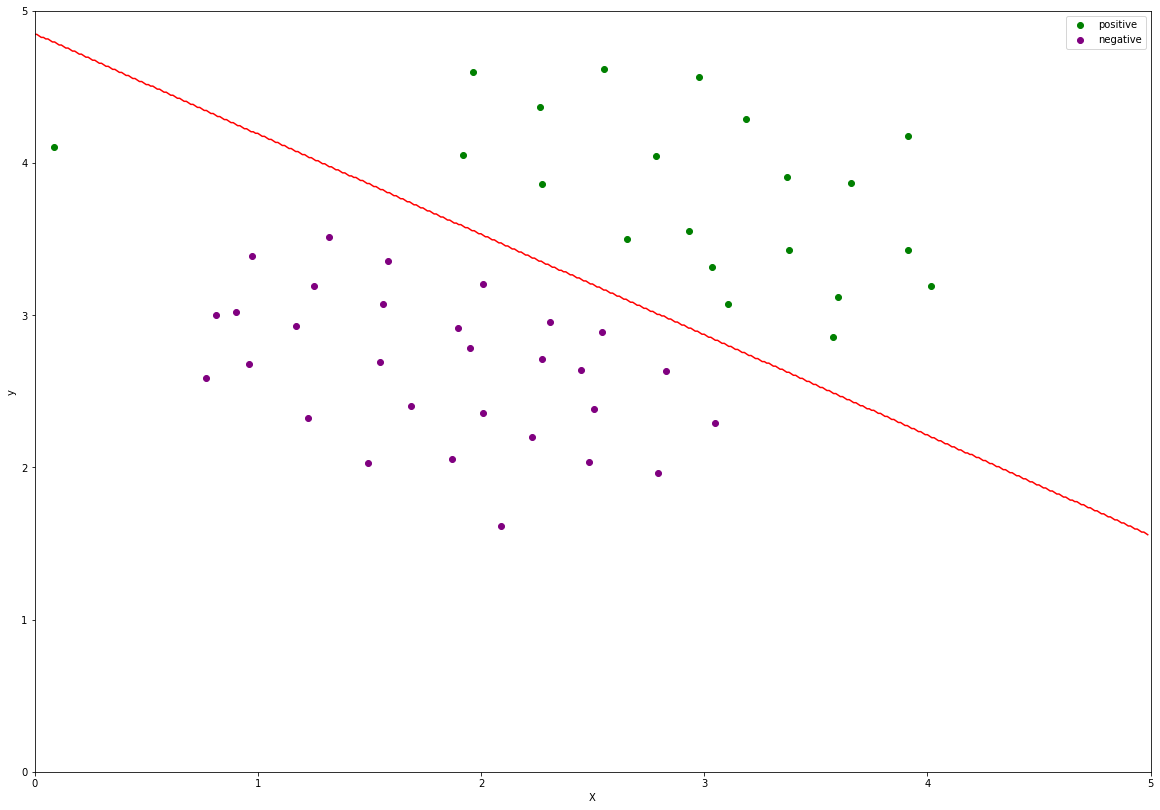

In [45]:
from sklearn import svm
#use C=1
clf=svm.SVC(kernel='linear',C=1,decision_function_shape='ovr')
clf.fit(X,y.ravel())
#plot data 
plot_data(X,y,'X','y','positive','negative',0,5,0,5)
#plot hyperplane(boundaries)
x_1,x_2=np.meshgrid(np.arange(0,5,0.01),np.arange(0,5,0.01))
Z=clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z=Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='red')

In [ ]:
# the outlier is not taken into account (one instance is misclassified)


## SVM with large regularization parameter

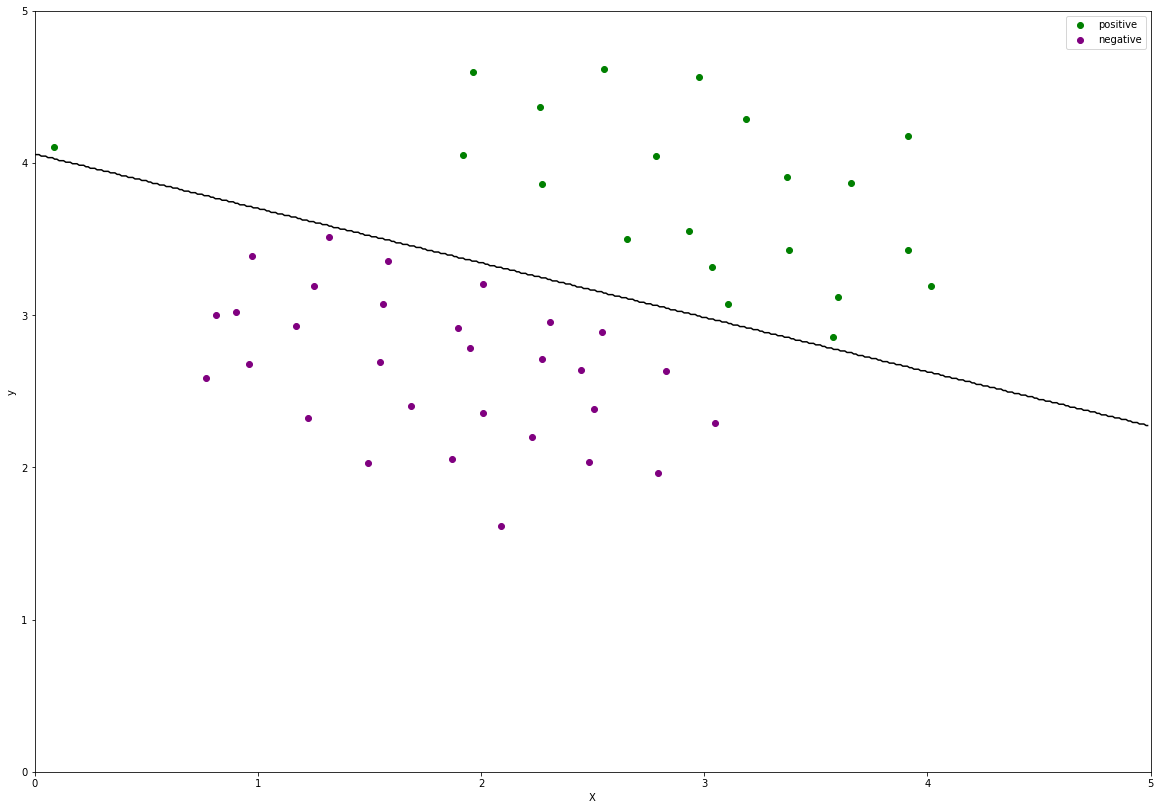

In [46]:
#use C=100
clf=svm.SVC(kernel='linear',C=100,decision_function_shape='ovr')
clf.fit(X,y.ravel())
#plot data 
plot_data(X,y,'X','y','positive','negative',0,5,0,5)
#plot hyperplane(boundaries)
x_1,x_2=np.meshgrid(np.arange(0,5,0.01),np.arange(0,5,0.01))
Z=clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z=Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='black')

In [ ]:
# the outlier is taken into account but likely overfitting

## SVM with non-linear boundary

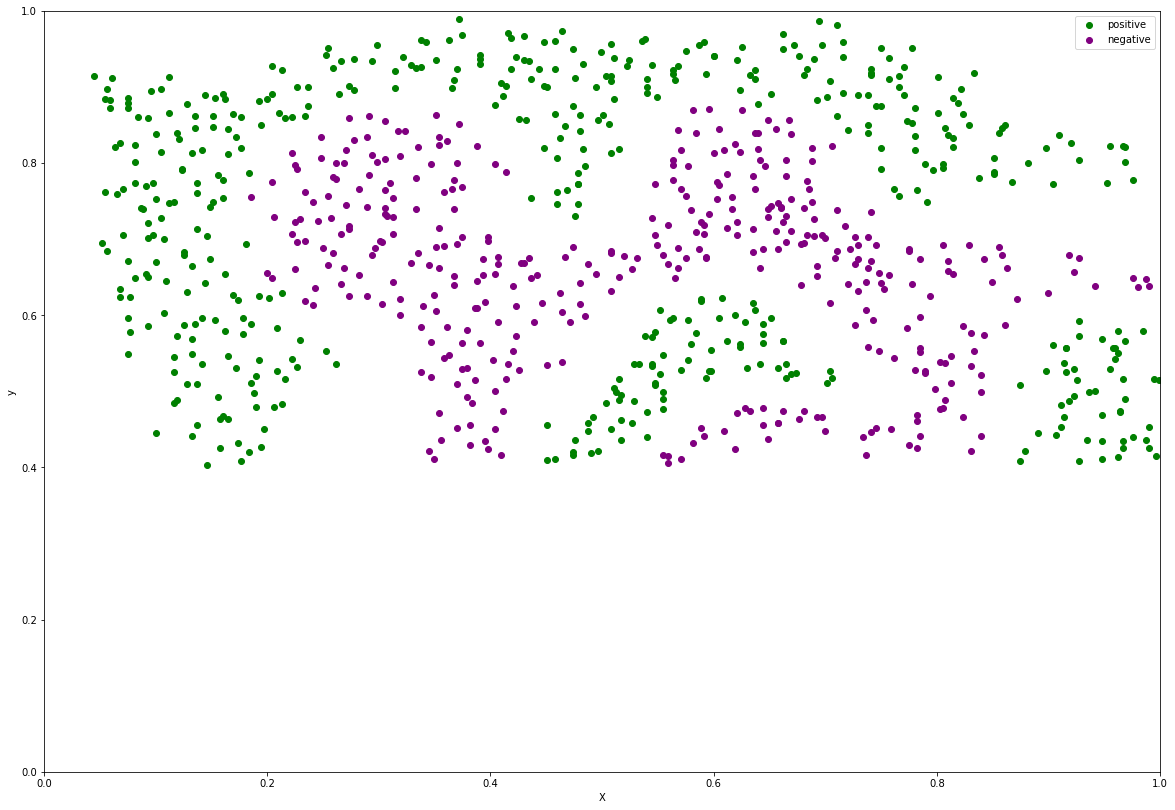

In [47]:
# look at dataset
data2=loadmat(DATAPATH_2)
X_2=data2['X']
y_2=data2['y']
#plot data
plot_data(X_2,y_2,'X','y','positive','negative',0,1,0,1)

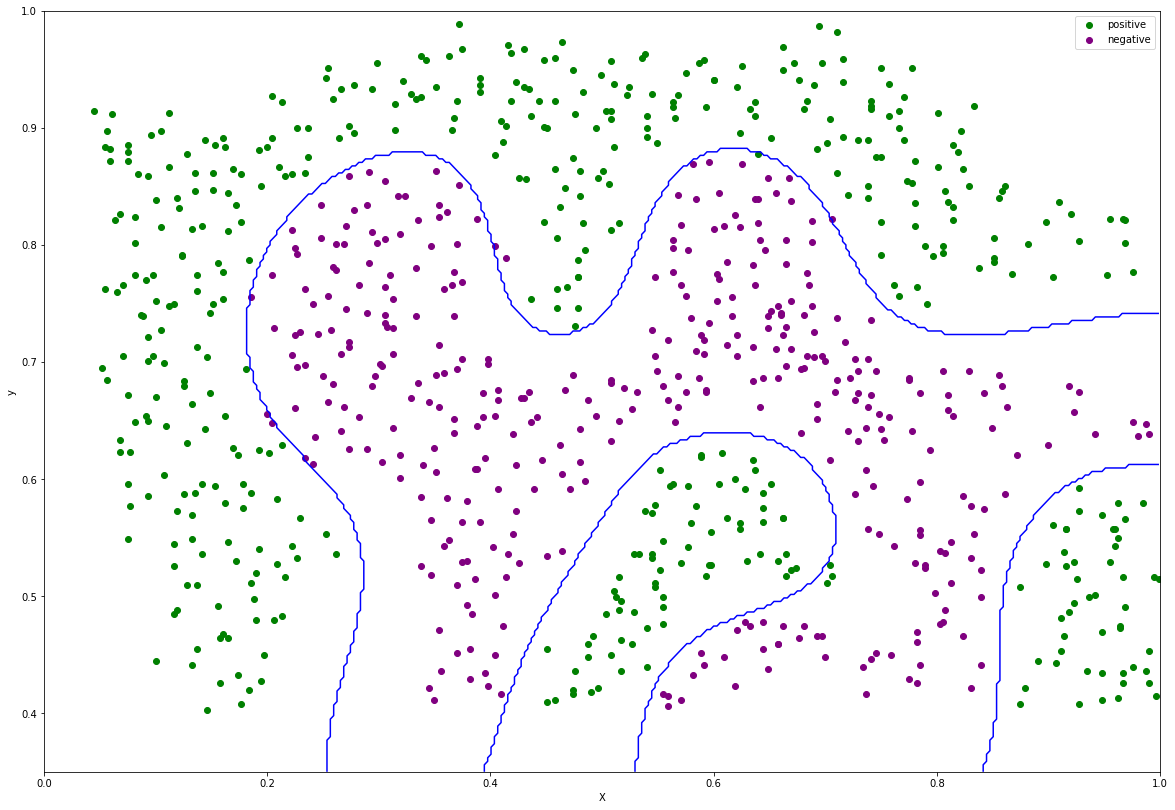

In [48]:
#use radial basic function (rbf) for the kernel
sigma=0.1
gamma=1/(2*sigma**2)
clfg=svm.SVC(kernel='rbf',gamma=gamma,C=1,decision_function_shape='ovr')
clfg.fit(X_2,y_2.ravel())
#plot data
plot_data(X_2,y_2,'X','y','positive','negative',0,1,0.35,1)
#plot hyperplane
x_1,x_2=np.meshgrid(np.arange(0,1,0.003),np.arange(0.35,1,0.003))
Z=clfg.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z=Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='blue')

## SVM with cross-validation

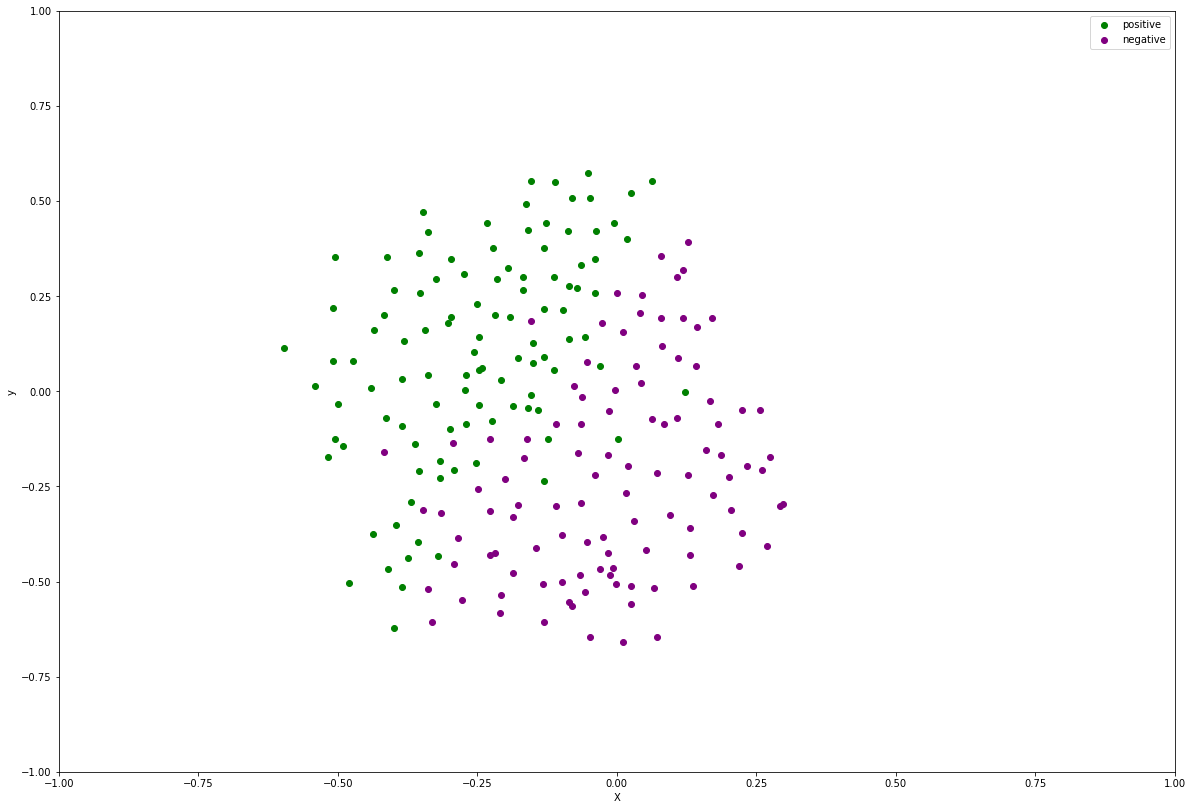

In [49]:
# look at dataset
data3=loadmat(DATAPATH_3)
X_3=data3['X']
y_3=data3['y']
#plot data
plot_data(X_3,y_3,'X','y','positive','negative',-1,1,-1,1)

In [50]:
# use CV for best parameters for best boundaries
sigma=[0.01,0.03,0.1,0.3,1,3,10,30]
C=[0.01,0.03,0.1,0.3,1,3,10,30]

errors=list()
sigma_c=list()

for each in sigma:
    for each_c in C:
        clf=svm.SVC(kernel='rbf',gamma=1/(2*(each**2)),C=each_c,decision_function_shape='ovr')
        clf.fit(X_3,y_3.ravel())
        errors.append(clf.score(data3['Xval'],data3['yval'].ravel()))
        sigma_c.append((each,each_c))

In [51]:
index=np.argmax(errors)
sigma_max,c_max=sigma_c[index]
print(f'The optimal value of sigma: {sigma_max}')
print(f'The optimal value of C: {c_max}')

The optimal value of sigma: 0.1
The optimal value of C: 1


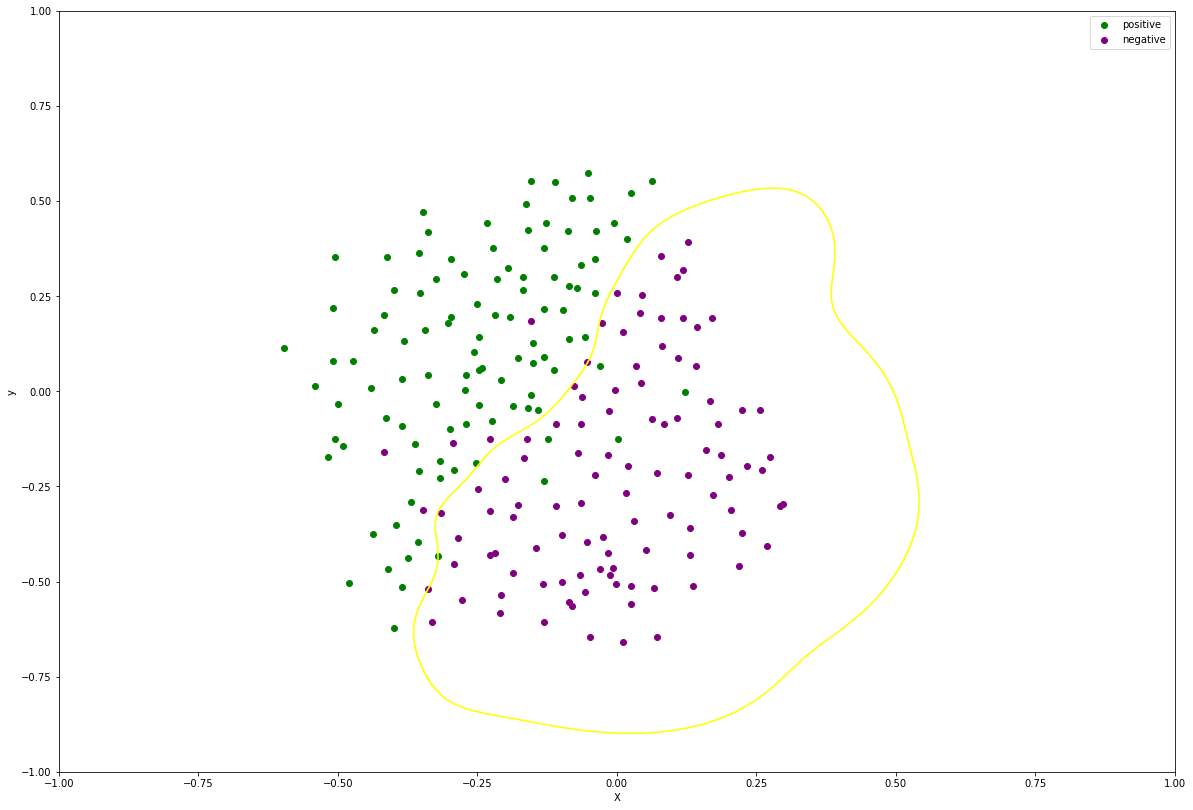

In [53]:
# use results above to fit algorithm
sigma=0.1
gamma=1/(2*(sigma**2))

optimal_clf=svm.SVC(kernel='rbf',gamma=gamma,C=1,decision_function_shape='ovr')
optimal_clf.fit(X_3,y_3.ravel())

#plot data
plot_data(X_3,y_3,'X','y','positive','negative',-1,1,-1,1)

#plot hyperplane
x_1,x_2=np.meshgrid(np.arange(-1,1,0.001),np.arange(-1,1,0.001))
Z=optimal_clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z=Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='yellow')

## Spam classification

In [57]:
spam_train=loadmat(DATA_SPAM_TRAIN)
spam_test=loadmat(DATA_SPAM_TEST)
C=0.1
X_train=spam_train['X']
y_train=spam_train['y']

X_test=spam_test['Xtest']
y_test=spam_test['ytest']

clf_spam=svm.SVC(kernel='linear',C=C,decision_function_shape='ovr')
clf_spam.fit(X_train,y_train.ravel())

train_acc=clf_spam.score(X_train,y_train.ravel())
test_acc=clf_spam.score(X_test,y_test.ravel())

print(f'Training accuracy={train_acc*100}')
print(f'Test accuracy={test_acc*100}')

Training accuracy=99.825
Test accuracy=98.9
